In [26]:
# input: datamatrix as loaded by numpy.loadtxt('dataset.txt')
# output:  1) the eigenvalues in a vector (numpy array) in descending order
#          2) the unit eigenvectors in a matrix (numpy array) with each column being an eigenvector (in the same order as its associated eigenvalue)
#
# note: make sure the order of the eigenvalues (the projected variance) is decreasing, and the eigenvectors have the same order as their associated eigenvalues

In [27]:
#Exercise 1a
import numpy as np
import matplotlib.pyplot as plt

def pca(data):
    '''Return an array of eigen vectors and eigenvalues for a long dataset'''
    cov_matrix = np.cov(data.T) # transpose to get the correct covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix) # calculate eigen stuff
    eigenvalues = eigenvalues[::-1] # reverse sort array
    eigenvectors = eigenvectors[:,::-1] # reverse sort matrix
    return eigenvectors, eigenvalues

def standardize_data(data):
    '''Transforms the data so that mean = 0 and sd = 1'''
    data = center_data(data)
    data = normalize_data(data)
    return data

def center_data(data):
    mean = np.mean(data, axis = 0)
    data = data - mean
    return data

def normalize_data(data):
    sd = np.std(data, axis = 0)
    data = data/sd
    return data


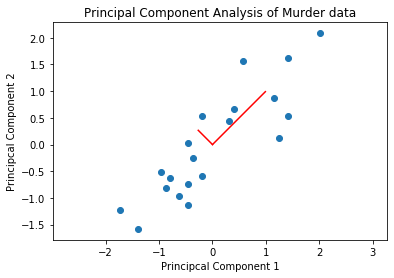

In [28]:
#Exercise 1b
murder = np.loadtxt("murderdata2d.txt")
murder = standardize_data(murder)
eigenvectors, eigenvalues = pca(murder)

#calculate Standard Deviation
sd_x = np.sqrt(eigenvalues[0])
sd_y = np.sqrt(eigenvalues[1])

#Plot figure
plt.scatter(murder[:,0], murder[:,1])
plt.axis('equal')
plt.plot([0, sd_x*eigenvectors[0,0]], [0, sd_x*eigenvectors[1,0]], "red")
plt.plot([0, sd_y*eigenvectors[0,1]], [0, sd_y*eigenvectors[1,1]], "red")
plt.title('Principal Component Analysis of Murder data')
plt.xlabel('Principcal Component 1')
plt.ylabel('Principcal Component 2')
#plt.savefig("figure1_PCAmurder.png")
plt.show()

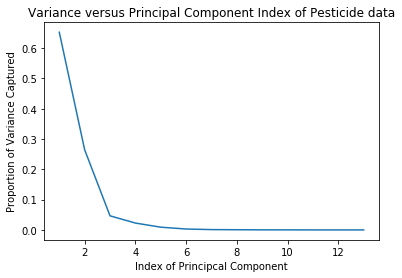

In [29]:
#Exercise 1c plot1
def min_dimensions(N, cum_variance):
    value = cum_variance[cum_variance > N][0] # get the first value which is bigger than N
    ind = np.where(cum_variance == value)[0][0] # return the index of that value
    ind = ind + 1 # python indexing starts at 0
    print(f"{ind} PCs are needed to capture {N*100}% of the variance")
    return ind

pesticide = np.loadtxt('IDSWeedCropTrain.csv', delimiter = ',')
pesticide = pesticide[:,:-1]
pesticide = center_data(pesticide)
eigenvectors, eigenvalues = pca(pesticide)
variance = eigenvalues/sum(eigenvalues)
count = list(range(1, len(variance)+1))

plt.plot(count, variance)
plt.title('Variance versus Principal Component Index of Pesticide data')
plt.xlabel('Index of Principcal Component')
plt.ylabel('Proportion of Variance Captured')
plt.show()

2 PCs are needed to capture 90.0% of the variance
3 PCs are needed to capture 95.0% of the variance


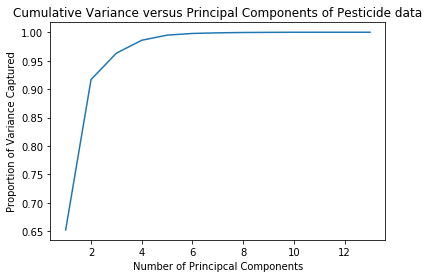

In [30]:
# Exercise 1c plot2
cum_variance = np.cumsum(eigenvalues/sum(eigenvalues))

min_dimensions(0.9, cum_variance)
min_dimensions(0.95, cum_variance)

plt.plot(count, cum_variance)
plt.title('Cumulative Variance versus Principal Components of Pesticide data')
plt.xlabel('Number of Principcal Components')
plt.ylabel('Proportion of Variance Captured')
plt.show()

In [31]:
# input:   1) datamatrix as loaded by numpy.loadtxt('dataset.txt')
#	   2) an integer d specifying the number of dimensions for the output (most commonly used are 2 or 3)
# output:  1) an N x d numpy array containing the d coordinates of the N original datapoints projected onto the top d PCs
#

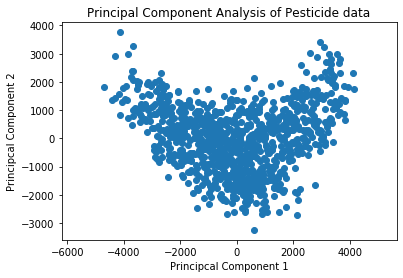

In [32]:
# Exercise 2
def mds(data, d):
    eigenvectors, eigenvalues = pca(data) # calculate eigenvectors
    eigenvectors = eigenvectors[:, :d] # select first d eigenvectors
    data = eigenvectors.T @ data.T # transpose EV to d*D matrix, transpose data to D*N matrix, get d*N matrix
    data = data.T #transpose to N*d matrix
    return data

transformed_pesticide = mds(pesticide, 2)

plt.scatter(transformed_pesticide[:,0], transformed_pesticide[:,1])
plt.axis('equal')
plt.title('Principal Component Analysis of Pesticide data')
plt.xlabel('Principcal Component 1')
plt.ylabel('Principcal Component 2')
plt.savefig("figure4_PCApesticide.png", dpi = 200)
#plt.show()

In [33]:
#Exercise 3
def initialize_kmeans(k, data):
    '''Create a list of k centroids (the first k values of the dataset)'''
    means = []
    for i in range(k):
        means.append(data[i])
    return means

def get_loss(means, data):
    '''Takes in a list of centroids and the data and returns the loss'''
    loss = 0
    for i in means:
        loss += sum(np.linalg.norm(data - i, axis = 1)**2) # loss = [distance(x - mu)]^2
    return loss

def get_newmean(means, data):
    '''Takes in a list of centroids and the data and returns a new list of centroids'''
    k = len(means)
    new_means = []
    distance_matrix = []
    for i in range(k): # create a matrix of distances from the centroid for each centroid
        distance = np.linalg.norm(data - means[i], axis = 1)
        distance_matrix.append(distance)
    distance_matrix = np.array(distance_matrix).T # Transpose so that the row number of the dist matrix matches the data row
    index = np.argmin(distance_matrix, axis = 1) # Find the closest centroid
    for i in range(k):
        cluster = data[np.where(index == i)] # Subset the data for each cluster
        new_mean = np.mean(cluster, axis = 0) # calculate the mean of each cluster
        new_means.append(new_mean)
    return new_means

def kmean(k, data):
    '''Calculate k mean clusters for the data'''
    means = initialize_kmeans(k, data)
    old_loss = get_loss(means, data)
    
    while True:
        means = get_newmean(means, data)
        new_loss = get_loss(means, data)
        if new_loss == old_loss:
            return means
            break
        else:
            old_loss = new_loss

pesticide = np.loadtxt('IDSWeedCropTrain.csv', delimiter = ',')
pesticide = pesticide[:,:-1]
centroids = kmean(2, pesticide)
print(f"Centroid 1: {centroids[0]}")
print(f"Centroid 2: {centroids[1]}")

Centroid 1: [5.70726496e+00 4.93012821e+01 7.92408120e+02 3.85595940e+03
 3.38821368e+03 1.35652778e+03 2.91737179e+02 1.29989316e+02
 6.86111111e+01 3.81880342e+01 1.87692308e+01 4.13461538e+00
 4.42307692e-01]
Centroid 2: [2.19924812e+00 1.40018797e+01 1.73727444e+02 1.40094549e+03
 3.18759962e+03 2.62043985e+03 1.00147368e+03 6.31413534e+02
 4.95295113e+02 2.95238722e+02 1.45689850e+02 2.91466165e+01
 2.82330827e+00]
